In [3]:
import pandas as pd
import altair as alt
from altair import datum
alt.renderers.enable('notebook')
import numpy as np

In [4]:
data = pd.read_csv('GLB.Ts+dSST.csv')

In [98]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [99]:
average_year = data.melt(id_vars='Year', value_vars=months).groupby("Year").mean()
line_data = average_year.loc[1880:1899]

In [716]:
df = average_year.reset_index()

In [16]:
config = {
    'stick_opacity': 0.5,
}

In [148]:
mean_line = alt.Chart(pd.DataFrame({'value': [0]})).mark_rule(color='red', size=0.5).encode(y="value")

In [412]:
trend = df.assign(value=df['value'].ewm(com=10).mean())

In [714]:
title = alt.Chart(pd.DataFrame([[1900,0.5]]))\
.mark_text(text='Annual Global Surface Temperature Change, Relative to Late 19th Century Average',
           align='center', fontSize=18, fontWeight="bold",dx=0, dy=-210)

In [706]:
df = df.assign(positive=lambda x: x['value']>=0)

In [707]:
lines = alt.Chart(df[1:], width=900, height=400)\
.mark_bar(color='black', size=7)\
.encode(x=alt.X('Year:Q', scale=alt.Scale(zero=False),
                axis=alt.Axis(format="d", title="", grid=True)),
        y=alt.Y('value', axis=alt.Axis(format="+S", title="Relative Change", grid=True)),
        fill=alt.Color('value', legend=None, scale=alt.Scale(range=['#21b4e2',  '#FFFFFF', '#FF7700', '#FF7700'])))

In [709]:
trend_line_legend = alt.Chart(pd.DataFrame({'Year': [1895], 'value': [1]}))\
.mark_tick(size=2, thickness=120, color='grey', opacity=0.3).encode(x='Year', y='value')+\
alt.Chart(pd.DataFrame({'Year': [1895], 'value': [1.02]}))\
.mark_text(text="Smoothed trend line", size=10).encode(x='Year', y='value')

In [710]:
mean_line_legend = alt.Chart(pd.DataFrame({'Year': [1895], 'value': [0.8]}))\
.mark_tick(size=2, thickness=120, color='red', opacity=0.3).encode(x='Year', y='value')+\
alt.Chart(pd.DataFrame({'Year': [1895], 'value': [0.82]}))\
.mark_text(text="19th Century Average", size=10).encode(x='Year', y='value')

In [711]:
trend_line = alt.Chart(trend[1:])\
.mark_line(size=2, strokeWidth=2.5, opacity=0.3, color='grey')\
.encode(x="Year", y='value')

In [712]:
mean_line_text_hotter = alt.Chart(pd.DataFrame([[2000, -0.1]]))\
.mark_text(text='⬆HOTTER', align='center', fontSize=8, fontWeight="bold",dx=-429, dy=46, color='darkred')
mean_line_text_colder = alt.Chart(pd.DataFrame([[2000, -0.1]]))\
.mark_text(text='⬇COLDER', align='center', fontSize=8, fontWeight="bold",dx=-429, dy=62, color='darkblue')

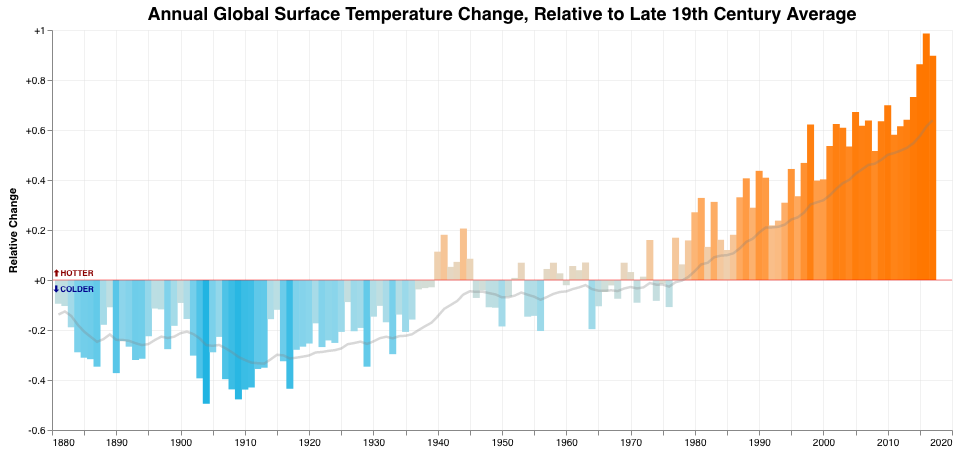

In [715]:
chart = lines + mean_line + trend_line +\
title + mean_line_text_hotter + mean_line_text_colder
chart.configure_axis(gridOpacity=0.4).configure_view(
    strokeWidth=0
).display(renderer='svg')